In [129]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [130]:
ms2_peaks_fragments_file = "/home/ubuntu/UPS2_allion/UPS2_allion-features-1-1097-ms2peaks-nrtd--0.25-prtd-0.25-nsd--4.0-psd-4.0-mnp-50000.csv"
features_fragments_file = "/home/ubuntu/UPS2_allion/UPS2_allion-features-1-1097-features-nrtd--0.25-prtd-0.25-nsd--4.0-psd-4.0-mnp-50000.csv"

In [132]:
# get all the proposed ms2 peaks and the fragments found by MSC
ms2_peaks_fragments_df = pd.read_table(ms2_peaks_fragments_file, sep=",", low_memory=False)

In [147]:
# get all the features
features_fragments_df = pd.read_table(features_fragments_file, sep=",", low_memory=False).sort_values(by=['msc_DeltaMassPPM'], ascending=True)

In [148]:
features_fragments_df.head()

,feature_id,charge_state,monoisotopic_mass,retention_time_secs,isotope_count,cluster_mz_centroid,cluster_summed_intensity,minimum_error,minimum_error_sulphur,msc_DiggerPepScore,msc_DeltaMassDa,msc_DeltaMassPPM
1459,362,2,874.5022177464417,33.2,5,438.258385,28701025,0.017625500268414463,0,74.358,-0.0002686,-0.307
361,362,2,874.5022177464417,33.2,5,438.258385,28701025,0.017625500268414463,0,74.358,-0.0002686,-0.307
2557,362,2,874.5022177464417,33.2,5,438.258385,28701025,0.017625500268414463,0,104.147,-0.0002686,-0.307
2253,58,2,1349.8023954588825,941.8,6,675.908474,447417423,0.005269184883949954,0,241.887,-0.0006916,-0.512
2871,676,2,2074.0023167515283,965.0,6,1038.008434,38182747,0.019135809497300954,0,3.01,-0.0017916,-0.8640000000000001


In [135]:
ms2_peaks_fragments_df.rename(columns={'peak_centroid_mz': 'ms2_peak_centroid_mz', 'ms2_scan_centroid': 'ms2_peak_centroid_scan'}, inplace=True)

In [149]:
feature_id = 362

In [150]:
feature_peaks_df = ms2_peaks_fragments_df[ms2_peaks_fragments_df.feature_id==feature_id]

In [151]:
msc_matched_df = feature_peaks_df[feature_peaks_df.msc_FragMZ > 0]

In [152]:
len(msc_matched_df)

11

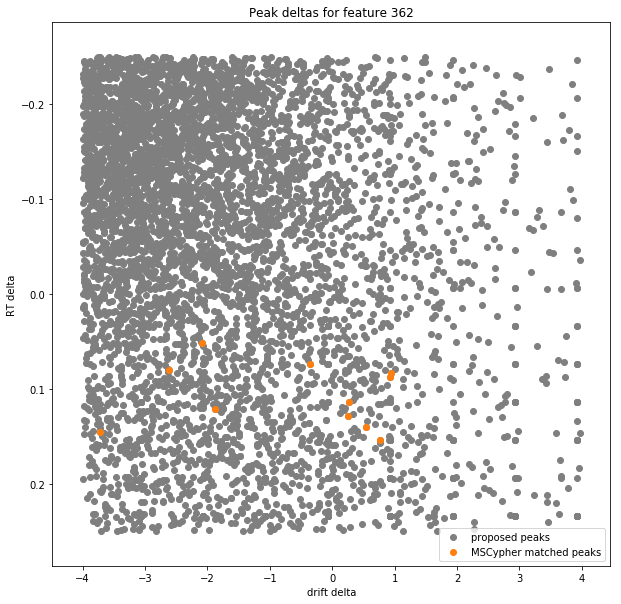

In [153]:
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.scatter(feature_peaks_df.scan_delta, feature_peaks_df.rt_delta, marker='o', color='tab:gray', label='proposed peaks')
ax1.scatter(msc_matched_df.scan_delta, msc_matched_df.rt_delta, marker='o', color='tab:orange', label='MSCypher matched peaks')
plt.legend(loc='best')
ax1.set_xlabel('drift delta')
ax1.set_ylabel('RT delta')
plt.title("Peak deltas for feature {}".format(feature_id))
plt.gca().invert_yaxis()
plt.margins(0.06)
plt.show()